# Image compression using PCA

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Image pre-processing

In [2]:
img = cv2.imread("figs/cat.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #cv2 outputs in bgr, converting to rgb

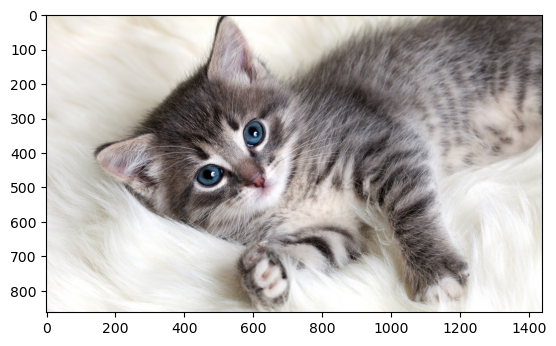

In [3]:
plt.imshow(img)
plt.show()

Converting the image to grayscale

In [4]:
img_gray = np.sum(img, axis=2) // 3

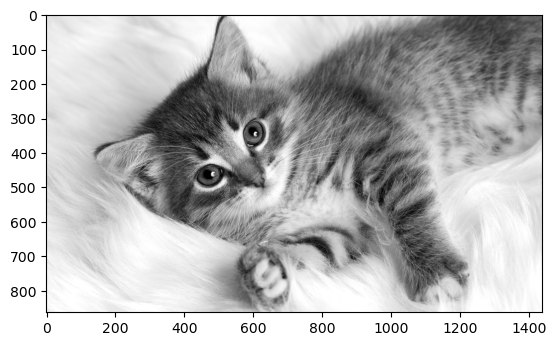

In [5]:
plt.imshow(img_gray, cmap="gray", vmin=0, vmax=255)
plt.show()

## Numpy implementation with eigendecomposition of covariance matrix

### PCA application

In [6]:
samples_on_rows = True

In [7]:
if samples_on_rows:
    mean = np.mean(img_gray, axis = 0).reshape(1,-1)
    
else:
    mean = np.mean(img_gray, axis = 1).reshape(-1,1)

img_gray_centered = (img_gray - mean)

Compute the covariance matrix

In [8]:
C = np.cov(img_gray_centered, rowvar=not(samples_on_rows))
print(C.shape)

(1440, 1440)


Eigendecomposition of the covariance matrix

In [9]:
Sigma, U = np.linalg.eigh(C)
Sigma, U = Sigma[::-1], U[:,::-1]

Projecting the data onto the first n components such that at least 95% of the variance is captured by the projection

In [10]:
n_components = 26
U_reduced = U[:,:n_components]
print(f"Amount of variance captured: {round(sum(Sigma[:n_components])/sum(Sigma)*100)}%")

Amount of variance captured: 95%


In [11]:
if samples_on_rows:
    low_dimensional_code = img_gray_centered@U_reduced
else:
    low_dimensional_code = U_reduced.T@img_gray_centered
    
print(f"Size of the low dimensional code: {low_dimensional_code.shape}")
print(f"Size of the reconstruction matrix: {U_reduced.shape}")
saved_space = 1 - (np.prod(low_dimensional_code.shape) + np.prod(U_reduced.shape))/ np.prod(img_gray.shape)
print(f"Amount of space saved by the compression: {round(saved_space*100)}%")

Size of the low dimensional code: (863, 26)
Size of the reconstruction matrix: (1440, 26)
Amount of space saved by the compression: 95%


### Image reconstruction

In [12]:
if samples_on_rows:
    img_reconstructed1 = (low_dimensional_code@U_reduced.T) + mean
else:
    img_reconstructed1 = (U_reduced@low_dimensional_code) + mean

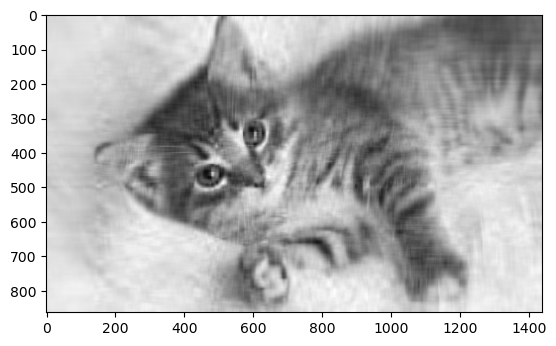

In [13]:
plt.imshow(img_reconstructed1, cmap="gray")
plt.show()

## Numpy implementation with SVD

### PCA application

Applying SVD to the image

In [14]:
u, s, vh = np.linalg.svd(img_gray_centered)

Projecting the data onto the first n components such that at least 95% of the variance is captured by the projection

In [15]:
if samples_on_rows:
    U_reduced = vh[:n_components,:].T
else:
    U_reduced = u[:,:n_components]

In [16]:
l = s**2 / img_gray.shape[not(samples_on_rows)]
print(f"Amount of variance captured: {round(sum(l[:n_components])/sum(l)*100)}%")

Amount of variance captured: 95%


In [17]:
if samples_on_rows:
    low_dimensional_code = img_gray_centered@U_reduced
else:
    low_dimensional_code = U_reduced.T@img_gray_centered
    
print(f"Size of the low dimensional code: {low_dimensional_code.shape}")
print(f"Size of the reconstruction matrix: {U_reduced.shape}")
saved_space = 1 - (np.prod(low_dimensional_code.shape) + np.prod(U_reduced.shape))/ np.prod(img_gray.shape)
print(f"Amount of space saved by the compression: {round(saved_space*100)}%")

Size of the low dimensional code: (863, 26)
Size of the reconstruction matrix: (1440, 26)
Amount of space saved by the compression: 95%


### Image Reconstruction

In [18]:
if samples_on_rows:
    img_reconstructed2 = (low_dimensional_code@U_reduced.T) + mean
else:
    img_reconstructed2 = (U_reduced@low_dimensional_code) + mean

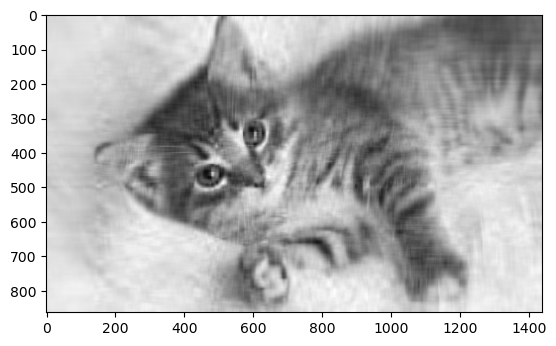

In [19]:
plt.imshow(img_reconstructed1, cmap="gray")
plt.show()

## Scikit-learn implementation

In [20]:
from sklearn.decomposition import PCA

### PCA application

In [21]:
pca = PCA(n_components = n_components)

In [22]:
if not(samples_on_rows):
    img_gray = img_gray.T #Scikit-learn treats the columns as features and the rows as samples

In [23]:
low_dimensional_code = pca.fit_transform(img_gray)

In [24]:
print(f"Amount of variance captured: {round(sum(pca.explained_variance_ratio_*100))}%")

Amount of variance captured: 95%


### Image reconstruction

In [25]:
img_reconstructed3 = pca.inverse_transform(low_dimensional_code)

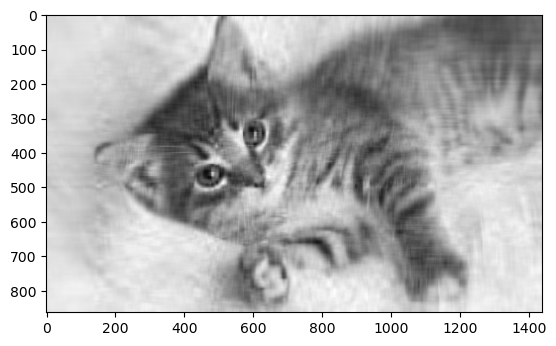

In [26]:
if not(samples_on_rows):
    img_reconstructed3 = img_reconstructed2.T
    
plt.imshow(img_reconstructed2, cmap="gray")
plt.show()